# Segmentation testing

This script tests the segmentation functions.

In [1]:
from bioio import BioImage
from matplotlib import pyplot as plt
import numpy as np
import skimage
from scipy import stats, ndimage
import math
import csv
import random
import os
import segmentation # Contains the segmentation scripts
import importlib
import shapely

In [73]:
# Path to image
image_file = ("..\\data\\Day 1 adult animals\\D1A_rep 3.nd2")

# Create a BioImage reader
reader = BioImage(image_file)

# Get number of z-planes
size_z = reader.shape[2]

image = reader.get_image_data("YXC", Z=2)


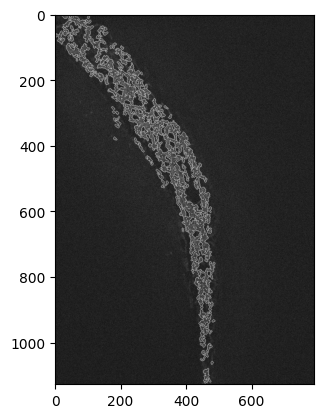

In [7]:
# Mitochondria
mask_mito = segmentation.segment_mitochondria(image)

outline = skimage.segmentation.find_boundaries(mask_mito)

fig, ax = plt.subplots()
ax.imshow(skimage.exposure.equalize_adapthist(image[:, :, 0].squeeze()), cmap='gray')
ax.imshow(outline,cmap='gray', alpha=0.5)
plt.show()


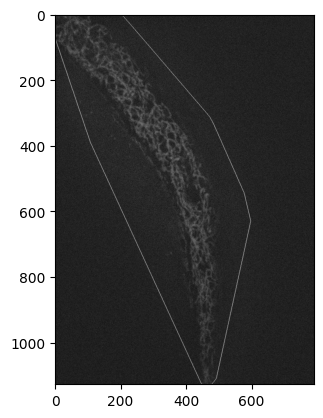

In [6]:
# Segment the tail
importlib.reload(segmentation)

mask = segmentation.segment_tail(image)

outline = skimage.segmentation.find_boundaries(mask)

fig, ax = plt.subplots()
ax.imshow(skimage.exposure.equalize_adapthist(image[:, :, 0].squeeze()), cmap='gray')
ax.imshow(outline,cmap='gray', alpha=0.5)
plt.show()

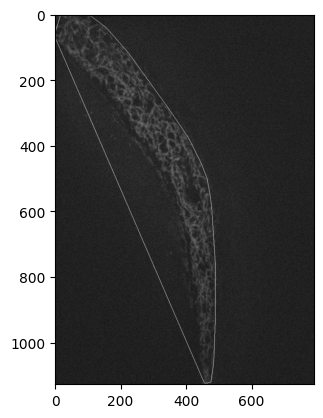

In [8]:
mask_tail_chull = skimage.morphology.convex_hull_image(mask_mito)

outline = skimage.segmentation.find_boundaries(mask_tail_chull)

fig, ax = plt.subplots()
ax.imshow(skimage.exposure.equalize_adapthist(image[:, :, 0].squeeze()), cmap='gray')
ax.imshow(outline,cmap='gray', alpha=0.5)
plt.show()

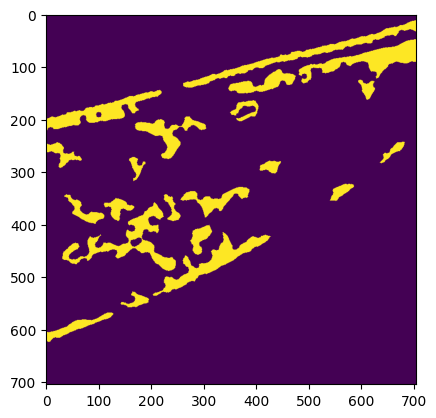

In [77]:
image_in = skimage.filters.gaussian(image[:, :, 1], 1)

frangi_image = skimage.filters.meijering(image_in)

thresh = skimage.filters.threshold_otsu(frangi_image)

mask = frangi_image > (0.2 * thresh)
mask = skimage.morphology.binary_opening(mask, skimage.morphology.disk(3))

mask = skimage.morphology.remove_small_objects(mask, 1000)

mask = ~mask

mask = skimage.morphology.remove_small_objects(mask, 500)

mask_large_objs = skimage.morphology.remove_small_objects(mask, 20000)

mask[mask_large_objs] = False

mask = skimage.morphology.binary_closing(mask, skimage.morphology.disk(5))

plt.imshow(mask)